In [1]:
import numpy as np
import random

from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline

import os, os.path

from Classifiers import *

In [3]:
def classify(clf, img, classes):
    distances = np.array(list(map(lambda img2: clf.Distance(img, img2), classes)))
    distances = distances / np.sum(distances)
    
    return distances.argmin()

def rank(clf, img, label, classes):
    distances = np.array(list(map(lambda img2: clf.Distance(img, img2), classes)))
    distances = distances / np.sum(distances)
    
    dist = distances[label]
    r = sorted(distances).index(dist)
    
    return r

In [2]:
random.seed(0)

# Train/Test set
path = 'data/att/'

train = []
labels = []
test = []

i = 0
for dir in os.listdir(path)[:11]:
    dir_path = os.path.join(path, dir)
    if os.path.isdir(dir_path):
        subj_images = []
        
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            img = io.imread(file_path)
            subj_images.append(img)
        
        #random.shuffle(subj_images)
        
        test.append(subj_images[0])    # Save 1 image as an example of class
        train.extend(subj_images[1:])  # Add other images to train set ...
        labels.extend([i for x in subj_images[1:]])    # ... and save their class number
        
        i +=1
        
train = np.array(train)
test = np.array(test)

In [12]:
# Normalize because why not
X_mean, X_std = train.mean(), train.std()
train_norm = (train - X_mean)/X_std
test_norm = (test - X_mean)/X_std

In [13]:
# Normalize, but depthwise
X_mean2, X_std2 = train.mean(axis=0), train.std(axis=0)
train_norm2 = (train - X_mean2)/X_std2
test_norm2 = (test - X_mean2)/X_std2

## Scale Classifier

In [45]:
scales = []
for s in [4,5,6,8]:
    scales.append(s)
    clf = ScaleClassifier(scales=scales)
    pred = list(map(lambda img: classify(clf, img, test), train))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    print(s, " -- ", acc)

4  --  0.7777777777777778
5  --  0.7777777777777778
6  --  0.7777777777777778
8  --  0.7777777777777778


In [50]:
scales = []
for s in [2,4,5,6,8,10,12]:
    scales = [s]
    clf = ScaleClassifier(scales=scales)
    pred = list(map(lambda img: classify(clf, img, test_norm2), train_norm2))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    print(s, " -- ", acc)

2  --  0.7888888888888889
3  --  0.7888888888888889
4  --  0.8
5  --  0.7777777777777778
6  --  0.7666666666666667
8  --  0.7666666666666667
10  --  0.6888888888888889
12  --  0.7444444444444445


In [82]:
clf = ScaleClassifier(scales=[4])
pred = list(map(lambda img: classify(clf, img, test_norm2), train_norm2))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ', acc)

accuracy =  0.8


## Random points classifier

0.1111111111111111 25


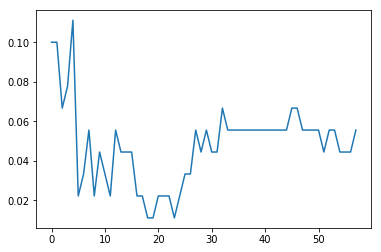

In [74]:
history = []
for n in range(10, 300, 5):
    rp_clf = RandomPointsClassifier(n_points=n, random_state=0)
    
    pred = list(map(lambda img: classify(rp_clf, img, test), train))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    
    history.append(acc)

plt.plot(history)
print(max(history),  5+history.index(max(history))*5)

0.8111111111111111 950


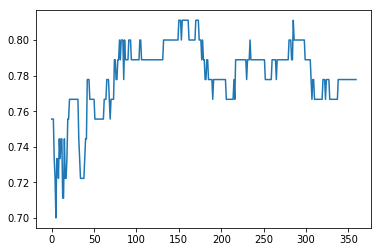

In [75]:
history = []
for n in range(200, 2000, 5):
    rp_clf = RandomPointsClassifier(n_points=n, random_state=0)
    
    pred = list(map(lambda img: classify(rp_clf, img, test_norm), train_norm))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    
    history.append(acc)

plt.plot(history)
print(max(history),  200+history.index(max(history))*5)

In [83]:
clf = RandomPointsClassifier(n_points=950)
pred = list(map(lambda img: classify(clf, img, test_norm), train_norm))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.8111111111111111


## DCT Classifier

0.8777777777777778 5


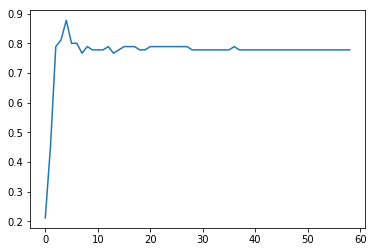

In [90]:
history = []
for n in range(1, 60):
    clf = DCTClassifier(size=n)
    
    pred = list(map(lambda img: classify(clf, img, test_norm2), train_norm2))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    
    history.append(acc)

plt.plot(history)
print(max(history),  1+history.index(max(history)))

In [88]:
clf = DCTClassifier(size=5)
pred = list(map(lambda img: classify(clf, img, test_norm2), train_norm2))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.8777777777777778


## DFT Classifier

In [184]:
clf = DFTClassifier(clipped=False)
pred = list(map(lambda img: classify(clf, img, test), train))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.7222222222222222


## Histogram classifier

0.6 9


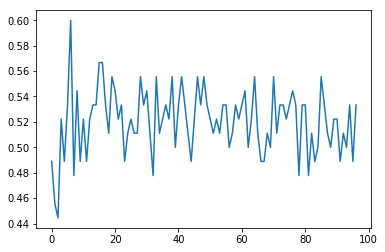

In [113]:
history = []
for n in range(3, 100):
    clf = HistogramClassifier(size=n)
    
    pred = list(map(lambda img: classify(clf, img, test), train))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    
    history.append(acc)

plt.plot(history)
print(max(history),  3+history.index(max(history)))

In [181]:
clf = HistogramClassifier(size=9)
pred = list(map(lambda img: classify(clf, img, test), train_norm))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.6111111111111112


## Gradient classifier

In [178]:
clf = GradientClassifier()
pred = list(map(lambda img: classify(clf, img, test), train))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.6222222222222222


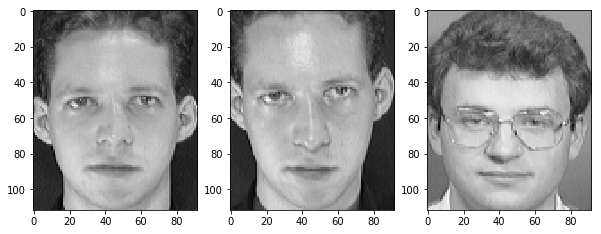

In [56]:
image1 = io.imread("data/att/s1/1.pgm")
image2 = io.imread("data/att/s1/3.pgm")
image3 = io.imread("data/att/s6/4.pgm")

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3, 1)
plt.imshow(image1, cmap="gray")
fig.add_subplot(1,3, 2)
plt.imshow(image2, cmap="gray")
fig.add_subplot(1,3, 3)
plt.imshow(image3, cmap="gray")
plt.show()

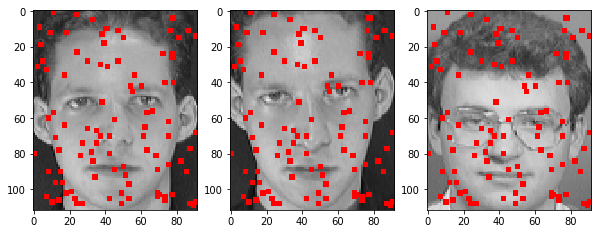

In [317]:
from skimage import draw

rp_clf = RandomPointsClassifier(n_points=100)

image1_rgb = np.stack((image1,)*3, axis=-1)
image2_rgb = np.stack((image2,)*3, axis=-1)
image3_rgb = np.stack((image3,)*3, axis=-1)

for point in rp_clf.points:
    rr,cc = draw.circle(*point, 2)
    draw.set_color(image1_rgb, (rr, cc), (255,0,0))
    draw.set_color(image2_rgb, (rr, cc), (255,0,0))
    draw.set_color(image3_rgb, (rr, cc), (255,0,0))
    
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3, 1)
plt.imshow(image1_rgb, cmap="gray")
fig.add_subplot(1,3, 2)
plt.imshow(image2_rgb, cmap="gray")
fig.add_subplot(1,3, 3)
plt.imshow(image3_rgb, cmap="gray")
plt.show()

In [173]:
print(rp_clf.Distance(image1,image2), clf.Distance(image1,image3))

1676.9710790589086 1720.782089632502
0.9999310188550172 0.9999127427722623


In [170]:
scale_clf = ScaleClassifier()
print(scale_clf.Distance(image1,image2), scale_clf.Distance(image1,image3))
print(scale_clf.Compare(image1,image2), scale_clf.Compare(image1,image3))

4.894269761823671 7.93735309423904
0.02889916471846876 0.07280025180278737


In [225]:
dct_clf = DCTClassifier()
print(dct_clf.Distance(image1,image2), dct_clf.Distance(image1,image3))

3015.5127481024333 5343.061177935257


In [256]:
dft_clf = DFTClassifier(clipped=False)
print(dft_clf.Distance(image1,image2), dft_clf.Distance(image1,image3))

1817.578354835592 1813.2997670730144


In [273]:
hist_clf = HistogramClassifier()
print(hist_clf.Distance(image1,image2), hist_clf.Distance(image1,image3))

601.0174706279344 2912.8515238508126


In [305]:
grad_clf = GradientClassifier()
print(grad_clf.Distance(image1,image2), grad_clf.Distance(image1,image3))

0.8060897463001703 1.7104441230506369


In [319]:
print("Random points -- ",  classify(rp_clf, image1, [image2, image3])==0)
print("Scales -- ",  classify(scale_clf, image1, [image2, image3])==0)
print("DCT -- ",  classify(dct_clf, image1, [image2, image3])==0)
print("DFT -- ",  classify(dft_clf, image1, [image2, image3])==0)
print("Histogram -- ",  classify(hist_clf, image1, [image2, image3])==0)
print("Gradient -- ",  classify(grad_clf, image1, [image2, image3])==0)

Random points --  True
Scales --  True
DCT --  True
DFT --  False
Histogram --  True
Gradient --  True
